In [1]:
import pandas as pd

## define column names
names = ['sepal_length','sepal_width','petal_length','petal_width','class']

df = pd.read_csv("iris.data.txt",header = None,names = names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


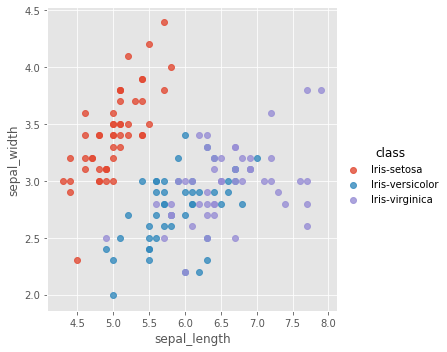

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.lmplot("sepal_length",'sepal_width',data=df,fit_reg=False,hue = "class")

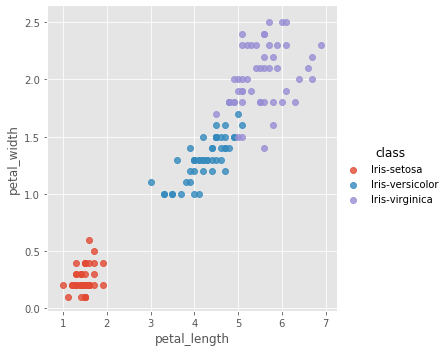

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.lmplot("petal_length",'petal_width',data=df,fit_reg=False,hue = "class")

# 選擇演算法

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

# create design matrix X and target vector y
X = df.iloc[:,:-1].values
y = df.iloc[:,4].values

# split into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model(k=3)
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(X_train,y_train)

# predict the response
pred = knn.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.98

# cross validation

In [9]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn,X_train,y_train,cv=10,scoring="accuracy")

In [10]:
scores

array([1.        , 1.        , 0.90909091, 1.        , 1.        ,
       0.9       , 1.        , 0.77777778, 1.        , 0.88888889])

In [13]:
neighbors = [x for x in range(0,50,1) if x%2 != 0]
print(neighbors)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


In [29]:
cv_scores=[]

for i in neighbors:
    # instantiate learning model(k=3)
    knn = KNeighborsClassifier(n_neighbors = i)

    # fitting the model
    knn.fit(X_train,y_train)

    # predict the response
    pred = knn.predict(X_test)
    
    score = cross_val_score(knn,X_train,y_train,cv=5,scoring="accuracy")
    
    cv_scores.append(score.mean())

cv_scores

[0.9278947368421051,
 0.9378947368421052,
 0.9589473684210527,
 0.9489473684210527,
 0.9489473684210527,
 0.9489473684210527,
 0.9489473684210527,
 0.9489473684210527,
 0.9384210526315788,
 0.9384210526315788,
 0.9489473684210527,
 0.938421052631579,
 0.9489473684210527,
 0.9384210526315788,
 0.9289473684210525,
 0.9289473684210525,
 0.9284210526315789,
 0.9284210526315789,
 0.9284210526315789,
 0.9284210526315789,
 0.9284210526315789,
 0.9284210526315789,
 0.8997129186602871,
 0.8891866028708133,
 0.843732057416268]

In [30]:
MSE = [1-x for x in cv_scores] #轉換為錯誤率

optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal numnber of neighbors is %d'% optimal_k)

The optimal numnber of neighbors is 5


Text(0, 0.5, 'Misclassification Error')

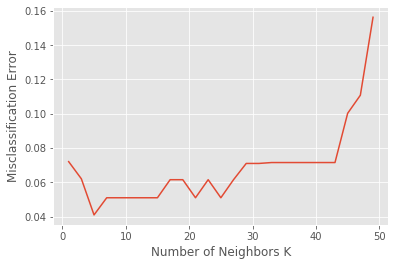

In [31]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')